In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm

from scipy.stats import shapiro

In [13]:
veri_seti = pd.read_excel('HW_Data_Set.xlsx')
df = veri_seti.copy()

df['ind_420'] = pd.to_numeric(df['ind_420'], errors='coerce')
df['ind_422'] = pd.to_numeric(df['ind_422'], errors='coerce')

df["ind_422"].fillna(df["ind_422"].median(), inplace=True)
df["ind_420"].fillna(df["ind_420"].median(), inplace=True)

df_dummies = pd.get_dummies(df)

In [14]:
X = df_dummies.drop(["20_target","50_target","90_target"], axis = 1)
y = df_dummies["50_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



In [15]:
pca = PCA(n_components=10)

X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [45]:
data_pca = pca.fit_transform(scale(df_dummies))

In [64]:
data_pca = pd.DataFrame(data_pca)

In [16]:
X_reduced_train[0:1,:]

array([[-7.76621894,  0.30730983, -0.90495406,  0.73278694,  0.17556917,
        -1.58563634,  0.1646165 ,  0.20115782,  0.9607926 ,  1.54789389]])

In [17]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)

array([36.54, 49.05, 55.03, 59.39, 62.98, 65.94, 68.72, 70.77, 72.74,
       74.38])

# KMeans

In [24]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=4)

In [49]:
k_fit = kmeans.fit(data_pca)

In [50]:
k_fit.cluster_centers_

array([[-9.24120894e+00, -5.65129287e-01,  6.51761468e-01,
         1.01743160e+00, -2.53606667e-01,  2.82641362e-02,
        -6.01685391e-02,  4.90693408e-02, -2.15633594e-01,
        -1.11891878e-01],
       [ 9.06865718e+00,  1.17134858e+00,  7.36408204e-01,
         6.85388487e-01, -3.26911608e-01,  5.92940508e-02,
        -6.87688518e-02,  7.63831743e-02, -1.73243142e-02,
         9.84413013e-02],
       [-2.29946439e+00,  3.51912373e+00, -2.35516468e-01,
        -1.05189772e+00, -1.42229052e-01, -2.38627852e-01,
        -3.06693898e-01, -1.45891151e-01, -1.20075059e-02,
         2.78103076e-03],
       [ 1.40033326e+00, -3.09221911e+00, -7.90561789e-01,
        -3.89220986e-01,  5.11377300e-01,  1.16725038e-01,
         3.18955253e-01,  2.11913607e-02,  1.66093078e-01,
         2.23931543e-03]])

In [51]:
k_fit.labels_

array([0, 0, 0, ..., 0, 0, 0])

# Optimum Küme Sayısı

In [4]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\abbas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


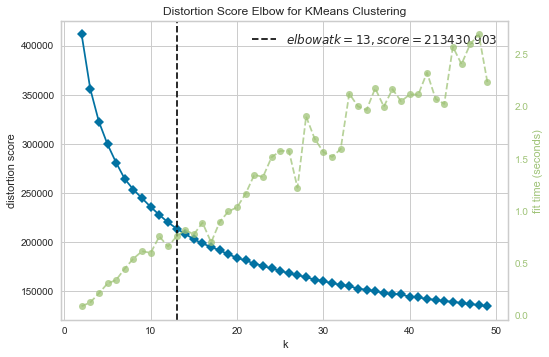

In [47]:
visualizer = KElbowVisualizer(kmeans, k=(2,50))

visualizer.fit(data_pca)

visualizer.poof()

In [93]:
kmeans = KMeans(n_clusters= 13)
k_fit = kmeans.fit(data_pca)
kumeler = k_fit.labels_
merkezler = k_fit.cluster_centers_

C:\Users\abbas\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


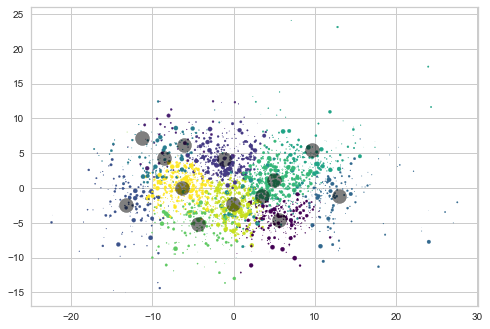

In [94]:
plt.scatter(data_pca.iloc[:,0], data_pca.iloc[:,1], merkezler, c= kumeler,  cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s= 200, alpha = 0.5)